In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv


# Exercise 12: Umbrella sampling

## Exercise 12.1: CHange of measure

To show the given identity, with $\pi= \frac{exp(-\beta E(C))}{\sum_{C} exp(-\beta E(C))}$ a canonical distribution function, and an observable $O$:

$$ \langle O\rangle _\pi =  \frac {\sum_C O(C) e^{-\beta E(C)}}{\sum_C e^{-\beta E(C)}} = \frac {\frac{\sum_C O(C) e^{-\beta E(C)} g(C)}{g(C)}}{\frac{\sum_C e^{-\beta E(C)}g(C)}{g(C)}} = \frac{\langle \frac{O(C)e^{-\beta E(C)}}{g(C)}\rangle _g}{\langle \frac{e^{-\beta E(C)}}{g(C)}\rangle _g}$$

## Exercise 12.2: Single Histogram Method



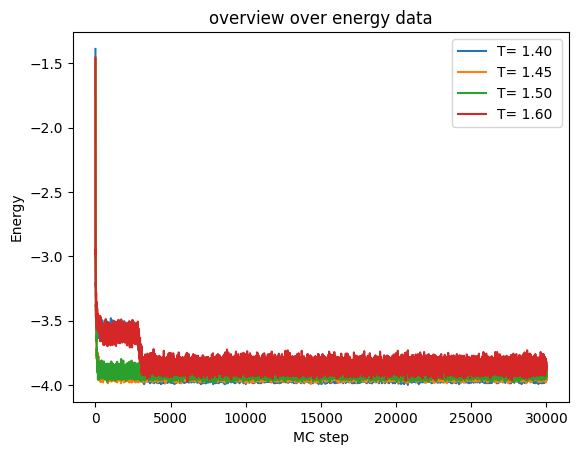

In [3]:
Ts=np.array([1.4,1.45,1.5,1.6])
data = []
with open('Ising_data.csv') as csvfile:
    contents= csv.reader(csvfile, delimiter=";")
    next(contents)#skip header line
    for row in contents:
        data.append(np.asarray(row).astype('float64'))
k=0
for i in data:

    plt.plot(i,label = "T= %.2f "%Ts[k] )
    k+=1
plt.title("overview over energy data")
plt.xlabel("MC step")
plt.ylabel("Energy")
plt.legend()


From now on I consider the system equilibrated after 10000 MC steps. One can see that the distributions overlap- at least partialy.


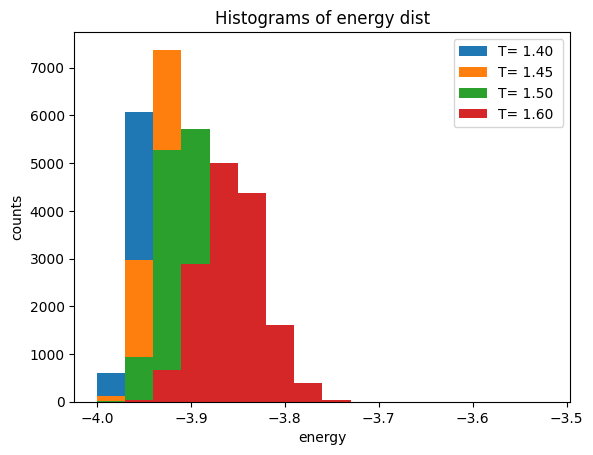

In [23]:
data_= []
for dat in data:
    data_.append(dat[15000:])

results_direct=np.mean(data_, axis=1)
dE=0.03
bins=np.arange(-4,-3.5,dE)

plt.title("Histograms of energy dist")
plt.hist(data_[0],bins, label= "T= %.2f "%Ts[0])
plt.hist(data_[1],bins,label= "T= %.2f "%Ts[1])
plt.hist(data_[2],bins,label= "T= %.2f "%Ts[2])
plt.hist(data_[3], bins,label= "T= %.2f "%Ts[3])
plt.xlabel("energy")
plt.ylabel("counts")
plt.legend()
plt.show()


In [29]:
b=1/Ts
def estimate_bi_from_bj(i,j):
    hist,edges=np.histogram(data_[j],bins)
    E= np.sum((bins[:-1])*hist*np.exp((b[j]-b[i])*bins[:-1]))/np.sum((hist*np.exp((b[j]-b[i])*bins[:-1])))
    return E

print(" direct energy Averages at different temperatures: ", results_direct)
print("trying to estimate energy at b0 (E= %f )from the different simulation histograms" %results_direct[0])
print("from simulation at b1: %f" %(estimate_bi_from_bj(0,1)))
print("from simulation at b2: %f"%(estimate_bi_from_bj(0,2)))
print("from simulation at b3: %f" %(estimate_bi_from_bj(0,3)))


 direct energy Averages at different temperatures:  [-3.93623829 -3.92048747 -3.90168512 -3.85596672]
trying to estimate energy at b0 (E= -3.936238 )from the different simulation histograms
from simulation at b1: -3.935683
from simulation at b2: -3.917114
from simulation at b3: -3.870802


One can see that when the energy distributions overlap more, the estimate from the histogram method is much closer to the direct estimate from the data. The greater the difference between the simulated and the aimed for beta, the more the estimated energy is closer to the  direct energy from the simulation rather than the energy at the temperature we aim to estiamte at


In [30]:

print("Averages for a higher temperatures: ", results_direct)
print("trying to estimate energy at b3 (E= %f )from the different histograms" %results_direct[3])
print("from simulation at b0: %f" %(estimate_bi_from_bj(3,0)))
print("from simulation at b1: %f" %(estimate_bi_from_bj(3,1)))
print("from simulation at b2: %f"%(estimate_bi_from_bj(3,2)))


Averages for a higher temperatures:  [-3.93623829 -3.92048747 -3.90168512 -3.85596672]
trying to estimate energy at b3 (E= -3.855967 )from the different histograms
from simulation at b0: -3.951153
from simulation at b1: -3.935627
from simulation at b2: -3.917043


for bigger temperatures, it becomes increasingly harder to estimate the energy, because smaller differences in T make a bigger difference in the internal energy,so the overlap becomes smaller and the estimates worse.